In [1]:
import numpy as np

from pol_analysis.polData import PolData
from pol_analysis.runPhot import RunPhot
from pol_analysis.getStokes import GetStokes

In [2]:
w0019 = PolData("W0019-1046","R_SPECIAL")#, force_new=True)

In [3]:
star_ex_ref = 1145
star_ey_ref = 37.5

In [4]:
phot = RunPhot(w0019)#, force_new=True)
phot.subtract_background(box_size=(25,25))
phot.get_source_positions(box_size=5)
stddev_0 = np.ones(16) * 1.4 / 2.355
stddev_0[8:] = 3.0 #1.5 / 2.355
phot.find_seeing(star_ex_ref, star_ey_ref, stddev_0=stddev_0, show_plots=False)
print(phot.seeing)
#phot.get_phot(r_ap=1.0, resubtract_background=False, force_new=True)
phot.get_phot(r_ap=1.0, resubtract_background=False, force_new=True, apply_convolution=True)
#phot.get_phot(r_ap=1.0, resubtract_background=True, force_new=True, apply_convolution=True)
#phot.get_phot(r_ap=0.5, resubtract_background=False)
#phot.get_phot(resubtract_background=True)

[1.11919084 1.0490138  1.06496564 1.25594511 1.21634144 1.15884546
 1.05958439 1.49308463 0.92754894 0.94732953 0.70921153 0.77163514
 0.82352423 0.7942171  0.79172375 0.823943  ]


In [5]:
stk_obj = GetStokes(w0019)
#stk_obj.get_pol()
stk_obj.get_pol(ob_ids=w0019.ob_pairs['OB_ID'][0:1], mjds=w0019.ob_pairs['MJD_folder'][0:1])
#stk_obj.get_pol(ob_ids=w0019.ob_pairs['OB_ID'][1:2], mjds=w0019.ob_pairs['MJD_folder'][1:2])

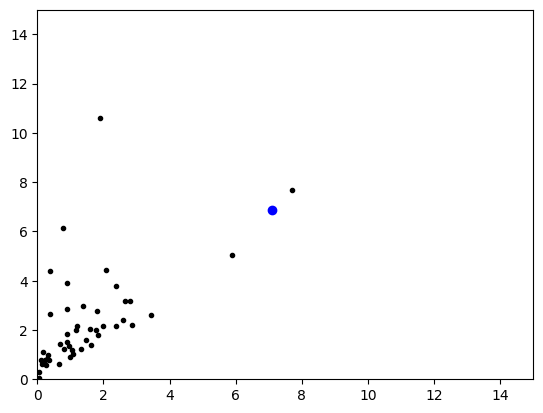

In [6]:
import matplotlib.pyplot as plt
# plt.plot(stk_obj.epol_frac*100, stk_obj.pol_frac*100, 'k.')
# plt.plot(stk_obj.epol_frac[6]*100, stk_obj.pol_frac[6]*100, 'bo')
# plt.xlim([0,30])
# plt.ylim([0,30])
epos_ref = np.loadtxt("phot/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.1.epos")
cond = (epos_ref[:,0]>210) & (epos_ref[:,0]<1840)
plt.plot(stk_obj.pol_frac[cond]*100, stk_obj.pol_frac[cond]/stk_obj.epol_frac[cond], 'k.')
k = np.argmin((epos_ref[:,0]-1020)**2 + (epos_ref[:,1]-70)**2)
plt.plot(stk_obj.pol_frac[k]*100, stk_obj.pol_frac[k]/stk_obj.epol_frac[k], 'bo')
plt.xlim([0,15])
plt.ylim([0,15])
plt.show()

In [7]:
epos = [None]*8
opos = [None]*8
for i in range(8):
    epos[i] = np.loadtxt("phot/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.{}.epos".format(i+1))
    opos[i] = np.loadtxt("phot/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.{}.opos".format(i+1))
    if i>0:
        epos[i] -= epos[0]
    opos[i] -= epos[0]
    opos[i][:,1] -= 90
for j in range(len(stk_obj.pol_frac)):
    if stk_obj.pol_frac[j]/stk_obj.epol_frac[j]<4. or epos[0][j,0]<210 or epos[0][j,0]>1840:
        continue
    str = "{:5.2f} {:5.2f} ".format(stk_obj.pol_frac[j]*100., stk_obj.epol_frac[j]*100.)
    str += "{:5.2f} {:5.2f} ".format(stk_obj.Q[j]*100., stk_obj.dQ[j]*100.)
    str += "{:5.2f} {:5.2f} ".format(stk_obj.U[j]*100., stk_obj.dU[j]*100.)
    for i in range(len(epos)):
        str += "{:6.1f} {:6.1f} ".format(epos[i][j,0],epos[i][j,1])
        str += "{:6.1f} {:6.1f} ".format(opos[i][j,0],opos[i][j,1])
    print(str)

 1.91  0.18 -1.01  0.18 -1.62  0.18 1035.1   29.9    0.2    0.5   -0.0   -0.2    0.0    0.4   -0.0   -0.2    0.1    0.3   -0.0   -0.2    0.1    0.4   -0.0   -0.2    0.1    0.3   -0.0   -0.2    0.1    0.4    0.0   -0.3    0.1    0.3   -0.0   -0.2    0.1    0.4 
 7.09  1.03  6.21  1.06 -3.43  1.04 1020.5   69.9   -0.2    0.4   -0.3    0.0   -0.2    0.3   -0.3    0.0   -0.3    0.4   -0.2    0.0   -0.3    0.4   -0.3   -0.1   -0.2    0.4   -0.3   -0.0   -0.3    0.3   -0.3    0.0   -0.2    0.3   -0.3    0.1   -0.3    0.3 
 0.37  0.08  0.09  0.09 -0.36  0.08 1016.2  246.1   -0.2    0.2   -0.1   -0.1   -0.2    0.2   -0.1   -0.1   -0.2    0.2   -0.1   -0.1   -0.2    0.2   -0.1   -0.1   -0.2    0.2   -0.1   -0.1   -0.2    0.2   -0.1   -0.1   -0.2    0.2   -0.1   -0.1   -0.2    0.1 
 7.70  1.00 -0.68  1.03 -7.67  1.00 1611.0  392.2    0.0    0.0    0.0   -0.2    0.0   -0.2   -0.0   -0.2   -0.0   -0.2    0.0   -0.2    0.0   -0.2   -0.0   -0.2   -0.0   -0.2   -0.1   -0.2   -0.1   -0.2    0.0   -0.2

In [8]:
from astropy.io import fits
ths = np.zeros(8)
for i in range(8):

    h = fits.open("../proc/reduced_images/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.{}.fits".format(i+1))
    ths[i] = h[0].header["HIERARCH ESO INS RETA2 ROT"]
    h.close()

    phot = np.loadtxt("phot/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.{}.phot".format(i+1))
    if i==0:
        fe  = np.zeros((len(ths), phot.shape[0]))
        dfe = np.zeros(fe.shape)
        fo  = np.zeros(fe.shape)
        dfo = np.zeros(fe.shape)
    fe[i]  = phot[:,0]
    dfe[i] = phot[:,1]
    fo[i]  = phot[:,2]
    dfo[i] = phot[:,3]

In [9]:
ths_unique = np.unique(ths)
F = np.zeros((len(ths_unique), fo.shape[1]))
dF = np.zeros(F.shape)
for i, th in enumerate(ths_unique):
    k = np.argwhere(ths==th)
    fo_sum  = np.sum(fo[k], axis=0)
    fe_sum  = np.sum(fe[k], axis=0)
    dfo_sum = np.sum(dfo[k]**2, axis=0)**0.5
    dfe_sum = np.sum(dfe[k]**2, axis=0)**0.5
    F[i] = (fo_sum - fe_sum)/(fo_sum + fe_sum)
    dF[i] = ((2*fe_sum*fo_sum)/(fo_sum+fe_sum)**2) * ((dfo_sum/fo_sum)**2 + (dfe_sum/fe_sum)**2)**0.5


In [10]:
import astropy.units as u
Q = np.zeros(F.shape[1])
U = np.zeros(Q.shape)
dQ = np.zeros(Q.shape)
dU = np.zeros(Q.shape)
for i, th in enumerate(ths_unique):
    Q += (2/len(ths_unique)) * F[i] * np.cos(4*th*u.deg)
    U += (2/len(ths_unique)) * F[i] * np.sin(4*th*u.deg)
    dQ += ((2/len(ths_unique)) * np.cos(4*th*u.deg))**2 * dF[i]**2
    dU += ((2/len(ths_unique)) * np.sin(4*th*u.deg))**2 * dF[i]**2
dQ = dQ**0.5
dU = dU**0.5

In [11]:
epos_ref = np.loadtxt("phot/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.1.epos")
Q_back = stk_obj.QU_background(epos_ref[:,0], epos_ref[:,1], "Q", "1")
U_back = stk_obj.QU_background(epos_ref[:,0], epos_ref[:,1], "U", "1")
Q -= Q_back
U -= U_back
dQ -= Q_back
dU -= U_back

In [12]:
P = (Q**2+U**2)**0.5
eP = ((Q*dQ)**2 + (U*dU)**2)**0.5 / P

In [13]:
for i in range(len(Q)):
    if epos_ref[i,0]<210 or epos_ref[i,0]>1840:
        continue
    print("{:5.2f} {:5.2f} {:5.2f} {:5.2f} {:5.2f} {:5.2f}".format(P[i]*100, eP[i]*100, Q[i]*100, dQ[i]*100, U[i]*100, dU[i]*100))

 1.91  0.16 -1.01  0.17 -1.62  0.16
 0.12  0.19  0.12  0.19 -0.03  0.25
 1.20  0.59 -1.10  0.32  0.49  1.25
 2.79  0.98 -2.06  0.96 -1.88  1.00
 7.09  1.07  6.21  1.08 -3.43  1.04
 0.17  0.27 -0.16  0.25 -0.06  0.37
 0.37  0.09 -0.36  0.03 -0.06  0.47
 0.90  0.62 -0.82  0.59  0.37  0.76
 0.28  0.47  0.25  0.46  0.13  0.49
 0.69  0.70 -0.19  0.66 -0.66  0.70
 0.24  0.42  0.05  0.41  0.23  0.42
 1.98  1.25 -1.76  1.14  0.89  1.61
 1.82  1.18 -1.48  0.76  1.06  1.73
 0.37  0.09  0.09  0.10 -0.36  0.09
 1.00  1.62 -0.98  1.63  0.21  1.61
 0.27  0.72 -0.11  0.72  0.25  0.72
 0.82  1.04  0.42  0.92  0.70  1.09
 1.37  1.08 -0.99  0.57  0.95  1.45
 0.37  0.68  0.06  0.62 -0.36  0.68
 1.64  1.52 -1.56  1.52  0.49  1.54
 2.85  1.30 -2.58  1.07  1.21  2.05
 2.38  1.79 -0.78  0.95  2.25  1.87
 0.06  0.52 -0.02  0.14  0.06  0.55
 7.70  1.55 -0.68  1.38 -7.67  1.55
 0.31  0.63  0.29  0.64 -0.12  0.58
 1.07  1.51 -1.05  1.52  0.23  1.39
 1.83  1.44  1.20  1.46 -1.38  1.43
 0.15  0.69  0.14  0.68 -0.0

(-0.02, 15.0)

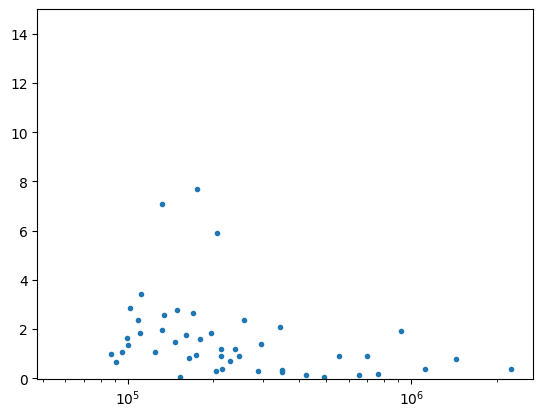

In [14]:
cond = (epos_ref[:,0]>210) & (epos_ref[:,0]<1840)
plt.plot(np.sum(fe[:,cond],axis=0), P[cond]*100, '.')
plt.xscale('log')
plt.ylim([-0.02,15])